In [13]:
from graphviz import Digraph
import sys
import os
from IPython.display import Image


In [14]:
class BNode:
    def __init__(self, val, idx=None):
        self.val = val
        self.left = None
        self.right = None
        self.idx = str(idx)

In [15]:
def save_png(dot, fname='save_png/binary_tree'):
    #print(dot.source)
    fname = fname.split('.')[0]
    img_name = fname + '.png'
    dot_name = fname + '.gv'
    
    dot.save(dot_name)
    cmd = 'dot -Tpng -o %s.png %s.gv'%(fname, fname)
    #print(cmd)
    os.system(cmd)

In [16]:
os.getcwd()

'F:\\GitHub\\Job'

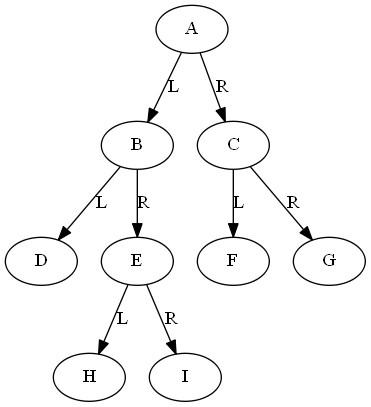

In [17]:
def ConstructByLevel(string, debug=False):
    '''
    @param string: 
        string is the level traverse of the complete tree
        #      represents empty
        a char represents a node 
    @return:
        the binary tree construct according to the given string
    '''
    if not string or string=='#':
        return None
    string = string.split(' ')
    dot = Digraph()
    dot_idx = [0,]
    
    def create_node(val, dot, dot_idx):
        dot_idx[0] += 1
        dot.node(name=str(dot_idx[0]),label=val)
        return BNode(val, dot_idx[0])
         
    root = create_node(string[0], dot, dot_idx)
    
    node_queue = [root]
    idx, slen = 0, len(string)
    while node_queue and idx < slen:
        node = node_queue.pop()
        idx += 1
        if idx < slen and string[idx] !='#':
            #newone = BNode(string[idx])
            
            newone = create_node(string[idx], dot, dot_idx)
            if debug:
                print(node.val,' -> ', newone.val)
            dot.edge(node.idx, newone.idx,'L')
            node.left = newone
            node_queue.insert(0, newone)
        idx += 1
        if idx < slen and string[idx] != '#':
            newone = create_node(string[idx], dot, dot_idx)
            if debug:
                print(node.val,' -> ', newone.val)
            dot.edge(node.idx, newone.idx,'R')
            node.right = newone
            node_queue.insert(0, newone)
    fname='save_png/binary_tree'
    save_png(dot, fname)
    return root

s = 'A B C D E F G # # H I'
root = ConstructByLevel(s)
Image(filename=r'save_png\\binary_tree.png')

In [18]:
def levelTraverse(root):
    if not root:
        return
        
    q = [root]
    last = root
      
    while q:
        node = q.pop()
        print(node.val,end=' ')
        if node.left:
            #print(node.left.val,end=' ')
            q.insert(0, node.left)
            
        if node.right:
            #print(node.right.val,end=' ')
            q.insert(0, node.right)
            
        if node == last:
            print('')
            if q:
                last = q[0]
levelTraverse(root)

A 
B C 
D E F G 
H I 


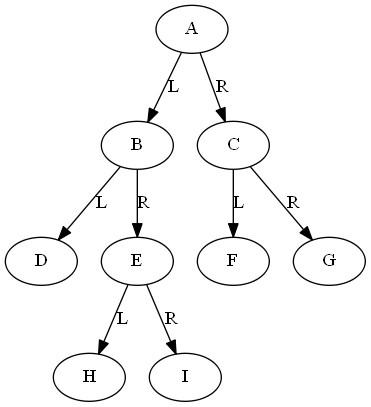

In [19]:
def draw_tree(root, fname='save_png/binary_tree2'):
    if not root:
        return
    
    def preOrderPrint(root, dot, dot_idx):
        if root != None:
            dot_idx[0] += 1
            root.idx = str(dot_idx[0])
            dot.node(name=str(dot_idx[0]),label=root.val)
            
            if root.left:
                preOrderPrint(root.left, dot, dot_idx)
                dot.edge(root.idx, root.left.idx,'L')
            if root.right:
                preOrderPrint(root.right, dot, dot_idx)
                dot.edge(root.idx, root.right.idx,'R')
                
    dot = Digraph()
    dot_idx = [0,]
    preOrderPrint(root, dot, dot_idx)
    #print(dot.source)
    
    save_png(dot, fname)

draw_tree(root)
Image(filename=r'save_png\binary_tree2.png')

In [20]:
def preOrderPrint(root):
    if root != None:
        print(root.val, end = ' ')
        preOrderPrint(root.left)
        preOrderPrint(root.right)
preOrderPrint(root)

A B D E H I C F G 

In [21]:
def inOrderPrint(root):
    if root:
        inOrderPrint(root.left)
        print(root.val, end=' ')
        inOrderPrint(root.right)
inOrderPrint(root)

D B H E I A F C G 

In [22]:
def postOrderPrint(root):
    if root:
        postOrderPrint(root.left)
        postOrderPrint(root.right)
        print(root.val, end=' ')
postOrderPrint(root)

D H I E B F G C A 

In [23]:
'''
Input: Binary tree: [1,2,3,4]
       1
     /   \
    2     3
   /    
  4     

Output: "1(2(4))(3)"

Explanation: Originallay it needs to be "1(2(4)())(3()())", 
but you need to omit all the unnecessary empty parenthesis pairs. 
And it will be "1(2(4))(3)".
'''
class Solution:
    def printTree(self, root):
        ret=str(root.val)+'('
        #print(ret)
        if root.left:
            ret += self.printTree(root.left)
            
        ret += ')'

        if root.right:
            ret += '(' + self.printTree(root.right) + ')'
        
        if not root.left and not root.right:
            ret = ret[:-2]
        return ret
    def tree2str(self, t):
        """
        :type t: TreeNode
        :rtype: str
        """
        if not t:
            return ""
        ret = self.printTree(t)
        return ret
s = Solution()
s.tree2str(root)

'A(B(D)(E(H)(I)))(C(F)(G))'

In [24]:
p = 'A B D E H I C F G'
i = 'D B H E I A F C G'
def ConstructCore_PI(preOrder, inOrder):
    if not preOrder:
        return None
    if len(preOrder) == 1 or len(inOrder) == 1:
        if len(preOrder) == len(inOrder) and preOrder[0] == inOrder[0]:
            return BNode(preOrder[0])
        else:
            raise RuntimeError("unmatched error : preOrder = ",preOrder,' inOrder = ',inOrder)
    p_val, mid = preOrder[0], 0

    while mid < len(inOrder):
        if inOrder[mid] == p_val:
            break
        mid += 1
    root = BNode(p_val)
    if mid > 0:
        root.left = ConstructCore_PI(preOrder[1 : mid+1], inOrder[:mid])
    if mid < len(inOrder):
        root.right = ConstructCore_PI(preOrder[mid+1:], inOrder[mid+1:])
    return root

def ConstructByPre_In(sp, si):
    sp = sp.strip().split(' ')
    si = si.strip().split(' ')

    return ConstructCore_PI(sp, si)
    
root = ConstructByPre_In(p, i)
preOrderPrint(root)
print('\n')
inOrderPrint(root)

A B D E H I C F G 

D B H E I A F C G 

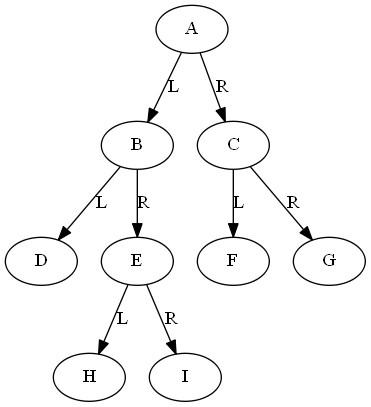

In [25]:
f1=r'draw_png\r1.png'
s = 'A B C D E F G # # H I'
r1 = ConstructByLevel(s)
draw_tree(r1, f1)
Image(filename=f1)

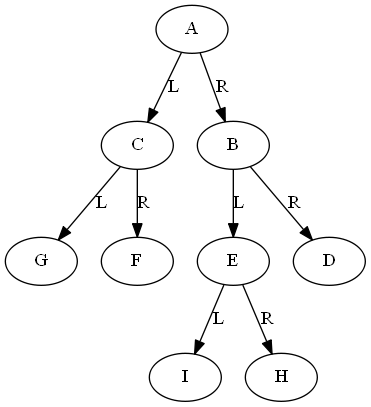

In [26]:
s2 = 'A C B G F E D # # # # I H'
r2 = ConstructByLevel(s2)
f2=r'draw_png\r2.png'
draw_tree(r2, f2)
Image(f2)

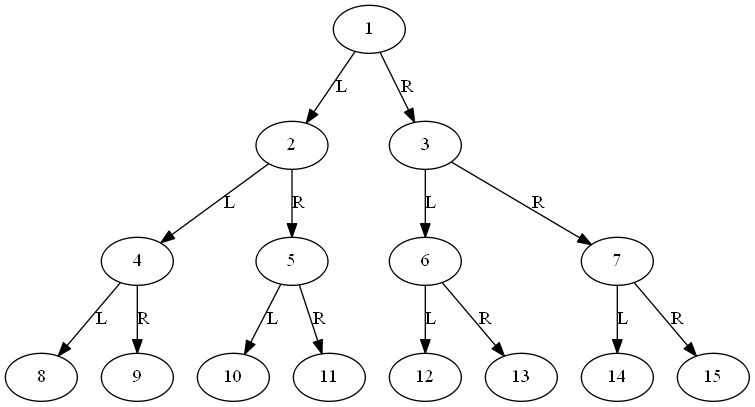

In [27]:
s2 = '1 2 3 4 5 6 7 8 9 10 11 12 13 14 15'
r2 = ConstructByLevel(s2)
f2=r'draw_png\r2.png'
draw_tree(r2, f2)
Image(f2)

In [28]:
def isSymmetrical(p1, p2):
    if not p1 and not p2:
        return True
    if not p1 or not p2:
        return False
    if p1.val != p2.val:
        return False
    l = isSymmetrical(p1.left, p2.right)
    r = isSymmetrical(p1.right, p2.left)
    return l and r
isSymmetrical(r1,r2)

False

In [29]:
def printByLevel(root):
    if not root:
        return
    plast = root
    stack=[[root,],[]]
    level = 0
    num = 1
    test = []
    while stack[0] or stack[1]:

        cur = stack[level].pop()
        print(cur.val,end = ' ')
        next_level = (level + 1) % 2
        if next_level == 1:
            if cur.left:
                stack[next_level].append(cur.left)

            if cur.right:
                stack[next_level].append(cur.right)

        else:
            if cur.right:
                stack[next_level].append(cur.right)

            if cur.left:
                stack[next_level].append(cur.left)

        if cur == plast:
            level = (level + 1) % 2
            if stack[level]:
                plast = stack[level][0]
            print("")
        
            
        #level = (level + 1) % 2
printByLevel(r2)

1 
3 2 
4 5 6 7 
15 14 13 12 11 10 9 8 


In [30]:
def verifySquenceOfBST(seq):
    if not seq :
        return False
    
    root = seq[-1]
    print(root, seq)
    i, length = 0, len(seq)-1
    while i < length:
        if seq[i] > root:
            break
        i += 1
    flag = i
    while i < length:
        if seq[i] < root:
            return False
        i += 1
    left = right = True
    if flag > 0:
        left = verifySquenceOfBST(seq[:flag])
    if flag < length :
        right = verifySquenceOfBST(seq[flag : -1])
        
    return left and right

seq = [5,7,6,9,11,10,8]

verifySquenceOfBST(seq)

8 [5, 7, 6, 9, 11, 10, 8]
6 [5, 7, 6]
5 [5]
7 [7]
10 [9, 11, 10]
9 [9]
11 [11]


True

In [60]:
import random

In [97]:

s = list(range(1,6)) * 8 
s = [str(i) for i in s] + ['#'] * 5
random.shuffle(s)
s = ' '.join(s)
s = '10 5 -3 3 2 # 11 3 -2 # 1'
print(s)
root = ConstructByLevel(s)
f=r'draw_png\r2.png'
draw_tree(root, f)

10 5 -3 3 2 # 11 3 -2 # 1


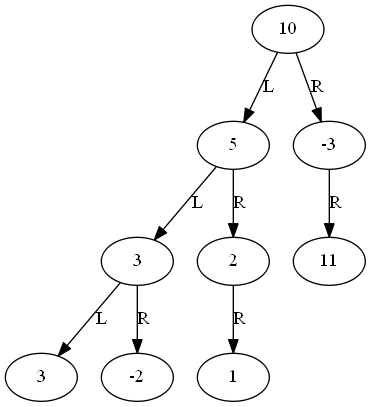

In [98]:
Image(f)

In [102]:
def findPathFromRoot(root, expectedSum, curSum, path, path_all, htable ):
    
    if not root:
        return None
    
    curSum += int(root.val)
    path.append(root.val)
    ret_path = path.copy()
    if not root.left and not root.right:
        htable[root] = {
            root:[root.val,]
        }
    if expectedSum == curSum:
        path_all.append(ret_path)
        path.pop()
        #del htable[curSum]
        curSum -= int(root.val)
        return htable[root]
        
        
    if root.left:
        lsum_dict = findPathFromRoot(root.left, expectedSum, curSum, path,  path_all, htable)
    if root.right:
        rsum_dict = findPathFromRoot(root.right, expectedSum, curSum, path,  path_all, htable)
        
    curSum -= int(root.val)
    path.pop()
    return htable[root]
    
def findPathCore(root, expectedSum, path_all):
    if not root:
        return None
    htable = dict()
    ret = None
    root_path = []
    ret = findPathFromRoot(root, expectedSum, 0, root_path, path_all, htable)
    if ret:
        path_all.append(ret)
        
    if root.left:
        findPathCore(root.left, expectedSum, path_all)
        
    if root.right:
        findPathCore(root.right, expectedSum, path_all)
        
    
def findPath(root, expectedSum):
    path_all = []
    if not root:
        return []
    findPathCore(root, expectedSum, path_all)
    return path_all


findPath(root,8)

[['5', '3'], ['5', '2', '1'], ['-3', '11']]

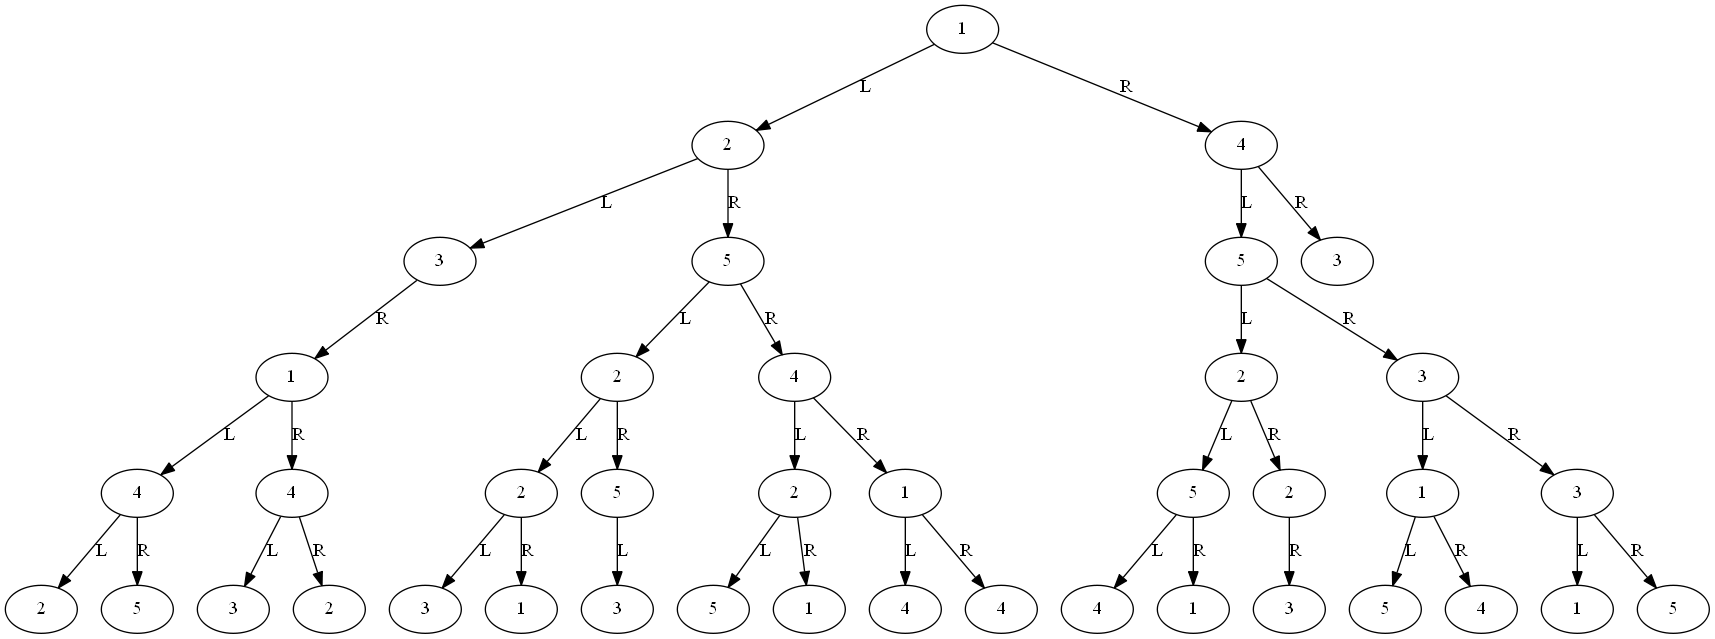

In [96]:
Image(f)